# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.fft import fft, fftfreq, rfft
from scipy.optimize import curve_fit
import scipy.integrate as sp

# Definitions

In [2]:
def data_process(title):
    """input: filename as a string
        output: file content as an array of floats
        Note: file header contains useful information which will be trimmed
    """
    data=np.array(pd.read_csv(title, low_memory=False))[11:,:]
    data_a=data.astype(np.float64)
    return(data_a)
    
def square(array):
    """
    squares all elements of an array
    """
    return [i**2 for i in array]


def sample_variance(data):
    """This is just stdv
    """
    meanD = np.mean(data)
    varD = 0
    for i in range(len(data)):
        varD += (data[i]-meanD)**2
    s2 = 1/(len(data)-1)*varD
    return s2

def SEM(data):
    """idk why this is a function
    """
    s = np.sqrt(sample_variance(data))
    return s/np.sqrt(len(data))

def freq_dict_maker(freq_data, volt_data):
    """
    """
    freq_array = np.unique(freq_data)
    freq_dict = {}

    for freq in freq_array:
        freq_dict[freq] = []
        for index in range(len(freq_data)):
            if freq == freq_data[index]:
                freq_dict[freq] += [volt_data[index]]

    return freq_dict
            
def meanAndStd(freq_data, volt_data):
    """
    """
    freq_array = np.unique(freq_data)
    freq_dict = freq_dict_maker(freq_data, volt_data)
    SEM_array = [SEM(freq_dict[freq]) for freq in freq_array]
    mean_array = [np.mean(freq_dict[freq]) for freq in freq_array]
    return freq_array, mean_array, SEM_array
      

def area_under_points(freq_data, volt_data, uncert_data):
    """
    """
    uncert_data = [volt_data[i] * 2 * uncert_data[i] for i in range(len(uncert_data))]
    volt_data = [volt_data[i]**2 for i in range(len(volt_data))]
    range_array = []
    midpoint_volt_array = []
    uncert_array = []
    max_volt_array = []
    min_volt_array = []
    for i in range(len(freq_data)-1):
        #print(freq_data[i+1])
        range_array += [freq_data[i+1]- freq_data[i]]
        midpoint_volt_array += [(volt_data[i]+ volt_data[i+1])/2]
        max_volt_array += [max(volt_data[i], volt_data[i+1])]
        min_volt_array += [min(volt_data[i], volt_data[i+1])]
        uncert_array += [np.sqrt(uncert_data[i]**2+ uncert_data[i+1]**2)]  
    area = np.sum([range_array[i]*midpoint_volt_array[i] for i in range(len(range_array))])
    max_area = ( np.sum([range_array[i]*max_volt_array[i] for i in range(len(range_array))]))
    min_area = ( np.sum([range_array[i]*min_volt_array[i] for i in range(len(range_array))]))
    area_uncert = np.sqrt(np.sum(square([range_array[i]*uncert_array[i] for i in range(len(range_array))])))
    return area, area_uncert, max_area, min_area

def RMS(array):
    """
    """
    MS = 0
    for i in array:
        MS+=i**2
    return np.sqrt(MS/len(array))

def fourier_plot(file_name):
    """Takes in a string giving the csv title
        returns a plot of the discrete fourier spectrum
    """
    df = np.array(pd.read_csv(file_name))
    N = int(len(df[:,0]))
    # sample spacing
    T = float((df[-1,0] - df[0][0])/N)


    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = np.array(df[:,1])

    yf = 2.0/N * np.abs(fft(y)[0:N//2])
    xf = fftfreq(N, T)[:N//2]
    return(xf,yf)
    #print(N,T)

    #plt.scatter(xf, 2.0/N * np.abs(yf[0:N//2]), s= 2)
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.axvline(x=60, c= 'r', alpha = .3, label = "60 Hz")
    #plt.axvline(x=180, c= 'green', alpha = .5, label = "180 Hz")
    #plt.axvline(x=240, c= 'orange', alpha = .5, label = "240 Hz")
    #plt.axvline(x=300, c= 'y', alpha = .5, label = "300 Hz")
    #plt.xlabel("Frequency (Hz)")
    #plt.ylabel("Fourier Coefficient (V)")

    #plt.legend(title = "Noise Spike Frequency")
    #plt.grid()
    #plt.show()
    
def minmax_freq(file_name):
    """Takes in the name of a csv file 
    and returns the minimum and maximum frequencies we can observe
    """
    data = np.array(pd.read_csv(file_name))
    N = int(len(data[:,0]))
    T = float((data[-1,0] - data[0][0]))
    f_s=N/T
    f_max=f_s/2
    f_min=1/T
    return(f_max,f_min)
    
def line(x, m, b):
    y=m*x+b
    return y

def fitfunc_noerr(func,x,y):
    param, cov = curve_fit(func, x, y)
    paramerr=np.sqrt(np.diag(cov))
    yfit=line(x, param[0], param[1])
    yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
    res=y-yfit
    return param,cov,paramerr,yfit,yfiterr,res
def attentuation_in_dB(V_in,V_out):
    dB=20*np.log10(V_out/V_in)
    return dB
#def Res_bandwith(deltaf, w_c)


# V_rms Visualization

In [3]:
R100k_a=np.array(pd.read_csv('Data/R100k_10_05_2023_trim.csv'))
R10k_a=np.array(pd.read_csv('Data/R10k_10_05_2023_trim.csv'))
R1k_a=np.array(pd.read_csv('Data/R1k_10_05_2023_trim.csv'))
R100k_vrms=np.mean(np.sqrt(square(R100k_a[:,1])))
R10k_vrms=np.mean(np.sqrt(square(R10k_a[:,1])))
R1k_vrms=np.mean(np.sqrt(square(R1k_a[:,1])))

Text(0.5, 1.0, 'Voltage over time for a 1 kiloOhm resistor')

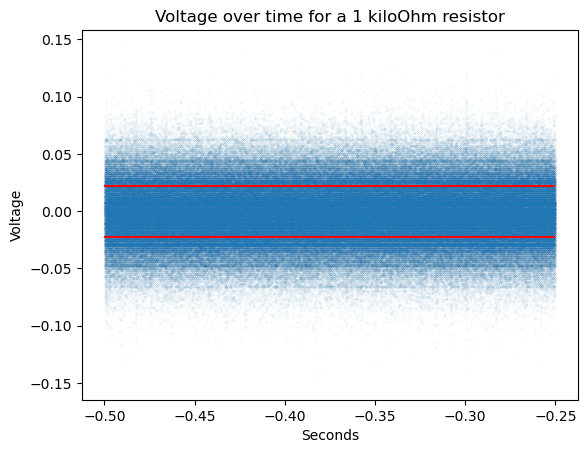

In [4]:
#General Voltage Plot
plt.plot(R1k_a[:,0], R1k_a[:,1], marker='o', linestyle='', markersize=0.03)
plt.hlines(R1k_vrms, R1k_a[0,0], R1k_a[-1,0], color='red')
plt.hlines(-R1k_vrms, R1k_a[0,0], R1k_a[-1,0], color='red')
plt.ylabel('Voltage')
plt.xlabel('Seconds')
plt.title('Voltage over time for a 1 kiloOhm resistor')

# Fourier Spectrum

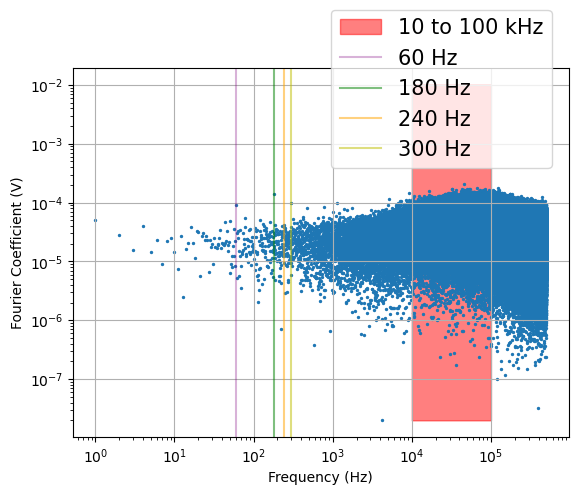

In [5]:

mini,maxi=minmax_freq('Data/f10to100r100.csv')
x,y=fourier_plot('Data/f10to100r100.csv')
fig,ax=plt.subplots()
plt.rcParams.update({'font.size': 15})
ax.fill_between(range(len(y)),min(y),max(y),where=(x>10000)&(x<100000), alpha=0.5, label='10 to 100 kHz', color='r')
#ax.fill_between(range(len(y)),min(y),max(y),where=(x>1)&(x<10), alpha=0.5, label='Flicker Noise Dominant', color='yellow')
ax.scatter(x, y, s= 2)
#plt.plot(x,1/x)
#plt.plot(x,np.sqrt(x))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Coefficient (V)")
plt.legend(title = "Noise Spike Frequency")
#plt.axvline(x=mini, c= 'r', alpha = .3, label = "Minimum frequency")
#plt.axvline(x=maxi, c= 'r', alpha = .3, label = "Maximum frequency")
ax.axvline(x=60, c= 'purple', alpha = .3, label = "60 Hz")
ax.axvline(x=180, c= 'green', alpha = .5, label = "180 Hz")
ax.axvline(x=240, c= 'orange', alpha = .5, label = "240 Hz")
ax.axvline(x=300, c= 'y', alpha = .5, label = "300 Hz")
plt.legend(bbox_to_anchor=(0.5,0.7))
plt.grid()
plt.show()

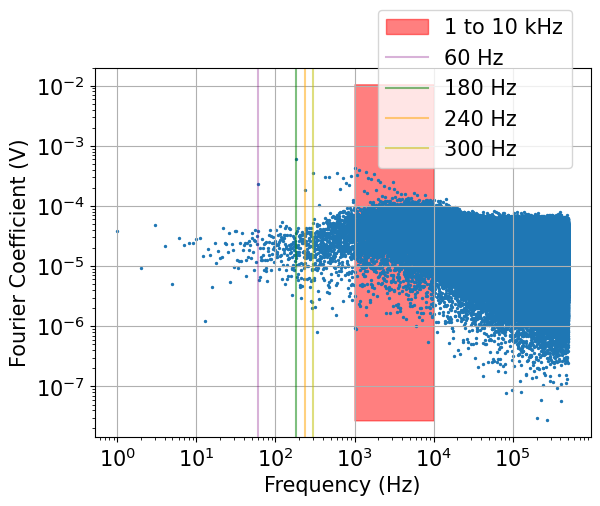

In [6]:
fourier_plot('Data/f1to10R100.csv')
x,y=fourier_plot('Data/f1to10r100.csv')
fig,ax=plt.subplots()
plt.rcParams.update({'font.size': 15})
ax.fill_between(range(len(y)),min(y),max(y),where=(x>1000)&(x<10000), alpha=0.5, label='1 to 10 kHz', color='r')
ax.scatter(x, y, s= 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Coefficient (V)")
plt.legend(title = "Noise Spike Frequency")
#plt.axvline(x=mini, c= 'r', alpha = .3, label = "Minimum frequency")
#plt.axvline(x=maxi, c= 'r', alpha = .3, label = "Maximum frequency")
ax.axvline(x=60, c= 'purple', alpha = .3, label = "60 Hz")
ax.axvline(x=180, c= 'green', alpha = .5, label = "180 Hz")
ax.axvline(x=240, c= 'orange', alpha = .5, label = "240 Hz")
ax.axvline(x=300, c= 'y', alpha = .5, label = "300 Hz")
plt.legend(bbox_to_anchor=(0.55,0.7))
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\apcol\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


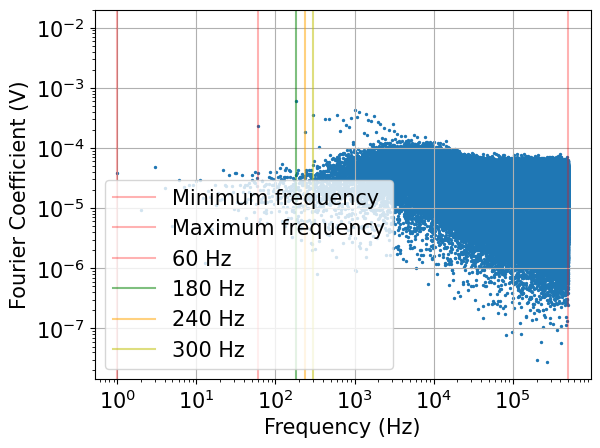

In [7]:
fourier_plot('Data/f1to10R100.csv')
x,y=fourier_plot('Data/f1to10r100.csv')
plt.scatter(x, y, s= 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Coefficient (V)")
plt.legend(title = "Noise Spike Frequency")
plt.axvline(x=mini, c= 'r', alpha = .3, label = "Minimum frequency")
plt.axvline(x=maxi, c= 'r', alpha = .3, label = "Maximum frequency")
plt.axvline(x=60, c= 'r', alpha = .3, label = "60 Hz")
plt.axvline(x=180, c= 'green', alpha = .5, label = "180 Hz")
plt.axvline(x=240, c= 'orange', alpha = .5, label = "240 Hz")
plt.axvline(x=300, c= 'y', alpha = .5, label = "300 Hz")
plt.legend()
plt.grid()
plt.show()

# Resistors

In [8]:
#Measured resistor values, as calculated in spreadsheet
R_a=np.array([2.2574, 101.7456, 1003.372, 9949.432, 100340.6, 996850])
#SEM
Rerr_a=np.array([0.0004, 0.0013, 0.005, 0.0029, 0.5, 100])
if len(R_a)!=len(Rerr_a):
    print('Warning, different length arrays')

In [9]:
#Find corner frequencies
#Let's define the relevant input values
V_rmsin=100/np.sqrt(2) #mV
bg_noamp=0.16 #mV
bg_noamp_err=0.005 #mV
#Let's create arrays with frequency and v_rms for all resistors
R0_fv=np.array(pd.read_csv('Data/cornfreq0.csv'))
R100_fv=np.array(pd.read_csv('Data/cornfreq100.csv'))
R1000_fv=np.array(pd.read_csv('Data/cornfreq1000.csv'))
R10000_fv=np.array(pd.read_csv('Data/cornfreq10000.csv'))
R100000_fv=np.array(pd.read_csv('Data/cornfreq100000.csv'))
R1000000_fv=np.array(pd.read_csv('Data/cornfreq1000000.csv'))
#Let's adjust to account for the background
R0_fv[:,1]=R0_fv[:,1]-bg_noamp
R100_fv[:,1]=R100_fv[:,1]-bg_noamp
R1000_fv[:,1]=R1000_fv[:,1]-bg_noamp
R10000_fv[:,1]=R10000_fv[:,1]-bg_noamp
R100000_fv[:,1]=R100000_fv[:,1]-bg_noamp
R1000000_fv[:,1]=R1000000_fv[:,1]-bg_noamp

#fit region close to 3 dB
R0_param,R0_cov,R0_paramerr,R0_yfit,R0_yfiterr,R0_res=fitfunc_noerr(line,R0_fv[:,0],R0_fv[:,1])
print('m=', R0_param[0],'+/-',R0_paramerr[0], 'b=',R0_param[1], '+/-', R0_paramerr[1])
R100_param,R100_cov,R100_paramerr,R100_yfit,R100_yfiterr,R100_res=fitfunc_noerr(line,R100_fv[:,0],R100_fv[:,1])
print('m=', R100_param[0],'+/-',R100_paramerr[0], 'b=',R100_param[1], '+/-', R100_paramerr[1])
R1000_param,R1000_cov,R1000_paramerr,R1000_yfit,R1000_yfiterr,R1000_res=fitfunc_noerr(line,R1000_fv[:,0],R1000_fv[:,1])
print('m=', R1000_param[0],'+/-',R1000_paramerr[0], 'b=',R1000_param[1], '+/-', R1000_paramerr[1])
R10000_param,R10000_cov,R10000_paramerr,R10000_yfit,R10000_yfiterr,R10000_res=fitfunc_noerr(line,R10000_fv[:,0],R10000_fv[:,1])
print('m=', R10000_param[0],'+/-',R10000_paramerr[0], 'b=',R10000_param[1], '+/-', R10000_paramerr[1])
R100000_param,R100000_cov,R100000_paramerr,R100000_yfit,R100000_yfiterr,R100000_res=fitfunc_noerr(line,R100000_fv[:,0],R100000_fv[:,1])
print('m=', R100000_param[0],'+/-',R100000_paramerr[0], 'b=',R100000_param[1], '+/-', R100000_paramerr[1])
R1000000_param,R1000000_cov,R1000000_paramerr,R1000000_yfit,R1000000_yfiterr,R1000000_res=fitfunc_noerr(line,R1000000_fv[:,0],R1000000_fv[:,1])
print('m=', R1000000_param[0],'+/-',R1000000_paramerr[0], 'b=',R1000000_param[1], '+/-', R1000000_paramerr[1])

m= -0.00023537815126256417 +/- 1.979581717599681e-06 b= 106.00109243748464 +/- 0.4929118699522246
m= -0.00024520000012446006 +/- 1.2961481270045983e-06 b= 108.18100003018156 +/- 0.3143994234014494
m= -0.00024531428566065323 +/- 8.264998703479441e-07 b= 108.1688571302535 +/- 0.19466659995061275
m= -0.00027800000006860954 +/- 1.3662600097434747e-06 b= 101.52000001303581 +/- 0.25976911023465926
m= -0.0009425899279420877 +/- 7.203878511920615e-06 b= 74.27683452933074 +/- 0.19026092646230747
m= -0.009508000002201866 +/- 0.0001454922767424614 b= 73.96600000015948 +/- 0.38407619177787583


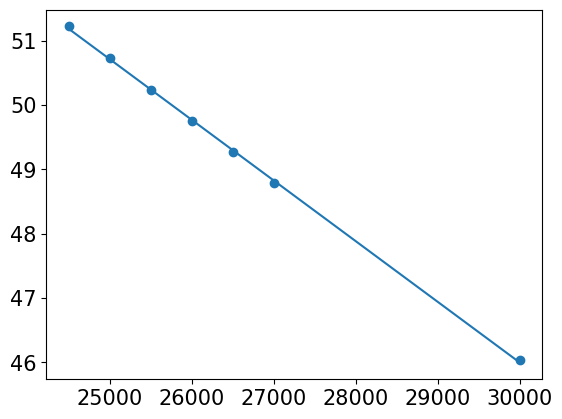

In [10]:
#example of fitting points
plt.scatter(R100000_fv[:,0], R100000_fv[:,1])
plt.plot(R100000_fv[:,0], R100000_yfit)

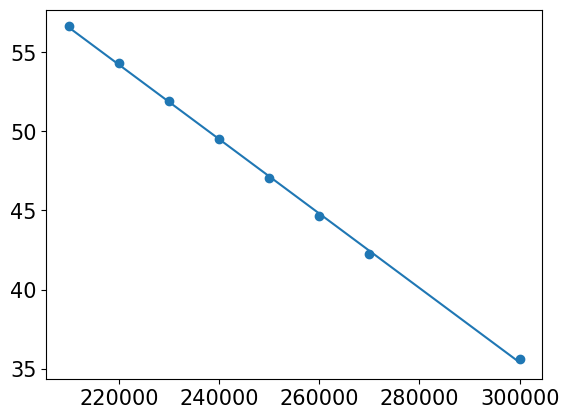

In [11]:
#example of fitting points
plt.scatter(R0_fv[:,0], R0_fv[:,1])
plt.plot(R0_fv[:,0], R0_yfit)

In [12]:
#We are going to approximate the frequency relationship as linear close to the corner frequency
V_atten=V_rmsin*10**(-3/20)
R0_w=(V_atten-R0_param[1])/R0_param[0]
R0_werr=np.sqrt((V_atten/R0_param[0]*R0_paramerr[0]/R0_param[0])**2+R0_param[0]/R0_param[1]*((R0_param[0]/R0_paramerr[0])**2+(R0_param[1]/R0_paramerr[1])**2))
print('for a 0 ohm resistor the corner frequency is', R0_w,'+/-', R0_werr)
R100_w=(V_atten-R100_param[1])/R100_param[0]
R100_werr=np.sqrt((V_atten/R100_param[0]*R100_paramerr[0]/R100_param[0])**2+R100_param[0]/R100_param[1]*((R100_param[0]/R100_paramerr[0])**2+(R100_param[1]/R100_paramerr[1])**2))
print('for a 100 ohm resistor the corner frequency is', R100_w,'+/-', R100_werr)

R1000_w=(V_atten-R1000_param[1])/R1000_param[0]
R1000_werr=np.sqrt((V_atten/R1000_param[0]*R1000_paramerr[0]/R1000_param[0])**2+R1000_param[0]/R1000_param[1]*((R1000_param[0]/R1000_paramerr[0])**2+(R1000_param[1]/R1000_paramerr[1])**2))
print('for a 1000 ohm resistor the corner frequency is', R1000_w,'+/-', R1000_werr)

R10000_w=(V_atten-R10000_param[1])/R10000_param[0]
R10000_werr=np.sqrt((V_atten/R10000_param[0]*R10000_paramerr[0]/R10000_param[0])**2+R10000_param[0]/R10000_param[1]*((R10000_param[0]/R10000_paramerr[0])**2+(R10000_param[1]/R10000_paramerr[1])**2))
print('for a 10 kilaohm resistor the corner frequency is', R10000_w,'+/-', R10000_werr)

R100000_w=(V_atten-R100000_param[1])/R100000_param[0]
R100000_werr=np.sqrt((V_atten/R100000_param[0]*R100000_paramerr[0]/R100000_param[0])**2+R100000_param[0]/R100000_param[1]*((R100000_param[0]/R100000_paramerr[0])**2+(R100000_param[1]/R100000_paramerr[1])**2))
print('for a 100 kilaohm resistor the corner frequency is', R100000_w,'+/-', R100000_werr)

R1000000_w=(V_atten-R1000000_param[1])/R1000000_param[0]
R1000000_werr=np.sqrt((V_atten/R1000000_param[0]*R1000000_paramerr[0]/R1000000_param[0])**2+R1000000_param[0]/R1000000_param[1]*((R1000000_param[0]/R1000000_paramerr[0])**2+(R1000000_param[1]/R1000000_paramerr[1])**2))
print('for a 1000 kilaohm resistor the corner frequency is', R1000000_w,'+/-', R1000000_werr)

for a 0 ohm resistor the corner frequency is 237667.6240015001 +/- 1788.6531529817578
for a 100 ohm resistor the corner frequency is 237037.82021058115 +/- 1079.1918116943755
for a 1000 ohm resistor the corner frequency is 236877.8911049311 +/- 687.5142419760344
for a 10 kilaohm resistor the corner frequency is 185110.3363859358 +/- 884.9701444646818
for a 100 kilaohm resistor the corner frequency is 25692.517314669767 +/- 405.8849582805466
for a 1000 kilaohm resistor the corner frequency is 2514.374580308986 +/- 80.53203278740567


In [13]:
len([R0_w, R100_w,R1000_w,R10000_w,R100000_w,R1000000_w])

6

Text(0, 0.5, 'Corner Frequency (Hz)')

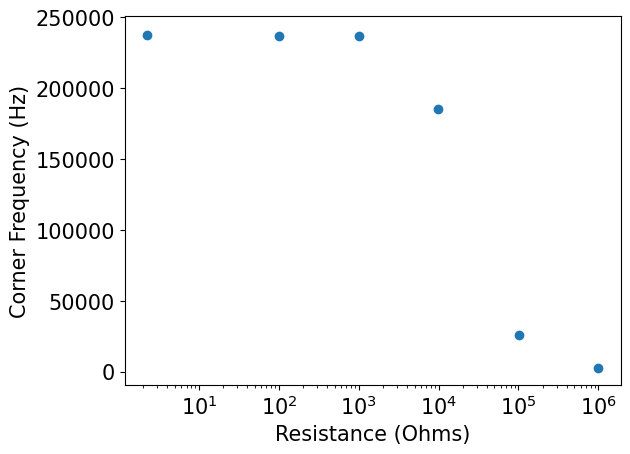

In [14]:
plt.errorbar(R_a, [R0_w, R100_w,R1000_w,R10000_w,R100000_w,R1000000_w], yerr=[R0_werr,R100_werr,R1000_werr,R10000_werr,R100000_werr,R1000000_werr], marker='o', linestyle='')
plt.xscale('log')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Corner Frequency (Hz)')

# Gain Profile

In [15]:
#constants
#decibels attenuated with with adjustable attenuator when its set to -45 
atten=-45.6163
#SEM error
atten_er=0.0014
#Gain imparted by the preamplifier
Gain=10000
#frequencies (Hz) at which the preamplifier attenuates by 
f_min=10000
f_max=100000
#Background rms of the preamplifier when grounded
dmm_vrms_bg=11.517 #mV
#SEM Error
dmm_vrms_bg_err=0.011 #mV

#input voltage set on preamplifier
V_in=100 #mV
#V_rms output after passing through the attenuator
V_in2=V_in/np.sqrt(2)*10**(atten/20)

gain_all=np.array(pd.read_csv('Data/gain_prof_all2.csv'))
freq=gain_all[:8,0]
Vg=(gain_all[:,1]-dmm_vrms_bg)#in millivolts, gain removed
Vg_err=np.sqrt(gain_all[:,2]**2+dmm_vrms_bg_err**2)

#lists
big_range=np.linspace(5,1000000,(10000000-5))
df3=[]

In [16]:
print(V_in2)

0.37039916772732767


In [17]:
print(Vg,Vg_err)

[7.253830e+02 1.649003e+03 2.572583e+03 3.185483e+03 3.189483e+03
 2.625863e+03 1.704843e+03 6.486030e+02 5.703000e+00 1.779730e+02
 3.597830e+02 8.244230e+02 1.290683e+03 1.599823e+03 1.611163e+03
 1.316643e+03 8.487830e+02 2.925030e+02 3.013000e+00 2.557300e+01
 5.751300e+01 1.418130e+02 2.272630e+02 2.846130e+02 2.877230e+02
 2.327930e+02 1.225930e+02 6.093000e+00 1.743000e+00 2.263000e+00
 3.743000e+00 1.007300e+01 1.808300e+01 2.385300e+01 2.403300e+01
 1.817300e+01 7.553000e+00 1.803000e+00 1.753000e+00 1.773000e+00
 1.783000e+00 1.873000e+00 2.053000e+00 2.173000e+00 2.163000e+00
 2.003000e+00 1.833000e+00 1.773000e+00 1.773000e+00] [0.02282542 0.04148494 0.02282542 0.03195309 0.63009602 0.07085901
 0.04148494 0.02282542 0.01486607 0.15040279 0.0511957  0.02282542
 0.70008642 0.02282542 0.02282542 0.02282542 0.22027483 0.02282542
 0.01486607 0.011      0.011      0.01486607 0.01486607 0.01486607
 0.02282542 0.01486607 0.01486607 0.02282542 0.01486607 0.01486607
 0.01486607 0.014

In [18]:
#Let's find the gain in dB
gain=(Vg/V_in2)/10000
gain_err=Vg_err/(V_in2)/10000

In [19]:
print(gain_err)

[6.16238545e-06 1.12000622e-05 6.16238545e-06 8.62666372e-06
 1.70112700e-04 1.91304466e-05 1.12000622e-05 6.16238545e-06
 4.01352650e-06 4.06055968e-05 1.38217651e-05 6.16238545e-06
 1.89008638e-04 6.16238545e-06 6.16238545e-06 6.16238545e-06
 5.94695797e-05 6.16238545e-06 4.01352650e-06 2.96976909e-06
 2.96976909e-06 4.01352650e-06 4.01352650e-06 4.01352650e-06
 6.16238545e-06 4.01352650e-06 4.01352650e-06 6.16238545e-06
 4.01352650e-06 4.01352650e-06 4.01352650e-06 4.01352650e-06
 4.01352650e-06 4.01352650e-06 4.01352650e-06 6.16238545e-06
 4.01352650e-06 4.01352650e-06 6.16238545e-06 4.01352650e-06
 8.62666372e-06 6.16238545e-06 4.01352650e-06 4.01352650e-06
 4.01352650e-06 4.01352650e-06 4.01352650e-06 4.01352650e-06
 6.16238545e-06]


In [20]:
#Let's seperate this out into the different resistors
R0_g=gain[:8]
R0_gerr=gain_err[:8]
R100_g=gain[10:18]
R100_gerr=gain_err[10:18]
R1k_g=gain[20:28]
R1k_gerr=gain_err[20:28]
R10k_g=gain[30:38]
R10k_gerr=gain_err[30:38]
R100k_g=gain[40:48]
R100k_gerr=gain_err[40:48]

In [21]:
#the transfer function of a band pass filter is
def band_pass_tf(x,K,a,b,C):
    y=(a*K*x)/np.sqrt((b-x**2)**2+(x*a)**2)+C
    return y
def fitfunc_err(func,x,y, yerr):
    param, cov = curve_fit(func, x, y, sigma = yerr , absolute_sigma = True, p0=[1, 90000, 1000000000, 0.01])
    paramerr=np.sqrt(np.diag(cov))
    yfit=band_pass_tf(x, param[0], param[1],param[2],param[3])
    #yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
    res=y-yfit
    return param,cov,paramerr,yfit, res
    

In [22]:
def best_band(x,G,f_c_sq,df,c):
    """x is a frequency input
        G is the gain constant
        f_c_sq is the center frequency squared or the 
            low frequency cutoff time the high frequency cutoff
        df is the frequency bandwidth
        c is some constant offset
    """
    y=(df*G*x)/np.sqrt((f_c_sq-x**2)**2+(x*df)**2)+c
    return y

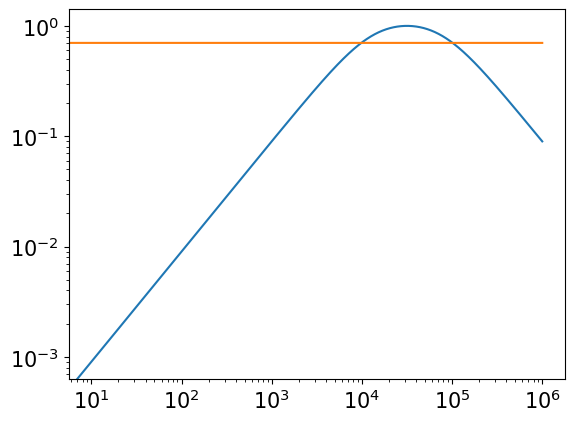

In [23]:
full_span=np.linspace(0,1000000,100000)
plt.plot(full_span, best_band(full_span, 1, 1000000000, 90000, 0))
plt.plot(full_span, 0.701*np.ones(len(full_span)))
plt.xscale('log')
plt.yscale('log')

In [24]:
R0g_param, R0g_cov = curve_fit(best_band, freq, R0_g, sigma = R0_gerr, absolute_sigma = True, p0=[0.8, 1000000000, 90000, 0])
R0g_paramerr=np.sqrt(np.diag(R0g_cov))
R0g_yfit=best_band(freq, R0g_param[0], R0g_param[1],R0g_param[2],R0g_param[3])
R0g_res=R0_g-R0g_yfit
R0_normres=R0g_res/R0_gerr
R0_chisq=sum(R0_normres**2)
R0_rdc=R0_chisq/len(R0_yfit)
print('gain=', R0g_param[0],'+/-',R0g_paramerr[0], 'squared central frequency=',R0g_param[1], '+/-', R0g_paramerr[1], 'bandwidth=', R0g_param[2], '+/-', R0g_paramerr[2],'constant offset=', R0g_param[3], '+/-', R0g_paramerr[3])

gain= 0.9075730671902331 +/- 1.1301819495779934e-05 squared central frequency= 992299204.0433369 +/- 26361.051973109923 bandwidth= 117777.27855086529 +/- 4.892657203797431 constant offset= -0.023584816663812073 +/- 1.1025715685873705e-05


In [25]:
print(R0_rdc)

990934.0861631031


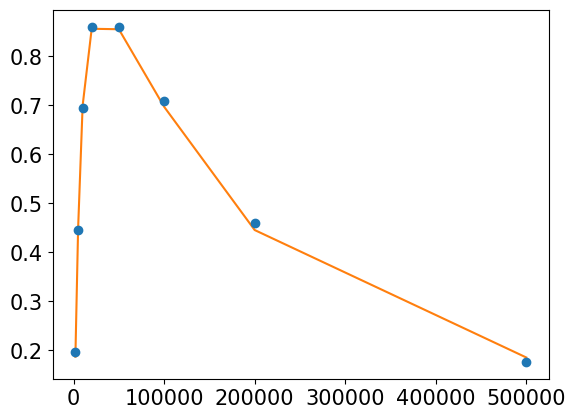

In [26]:
plt.errorbar(freq,R0_g,yerr=R0_gerr, marker='o', linestyle='')
plt.plot(freq, R0g_yfit)

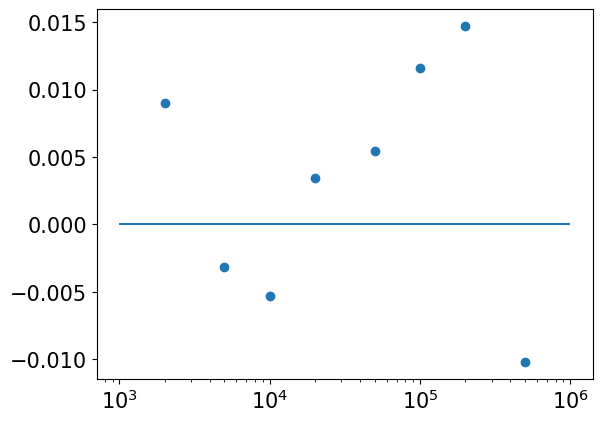

In [27]:
plt.errorbar(freq,R0g_res,yerr=R0_gerr, marker='o', linestyle='')
plt.hlines(0, xmin=1000,xmax=1000000)
plt.xscale('log')

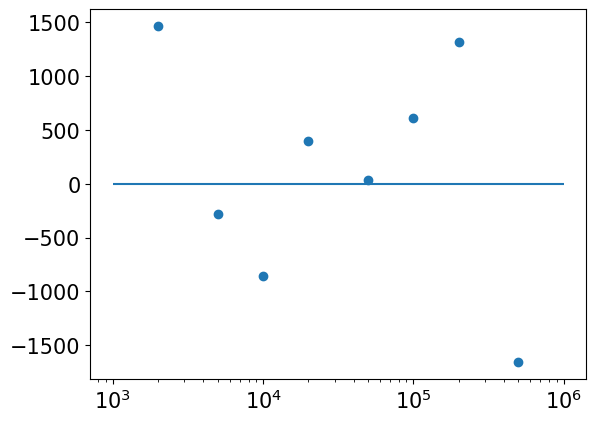

In [28]:
plt.errorbar(freq,R0_normres,yerr=np.ones(len(freq)), marker='o', linestyle='')
plt.hlines(0, xmin=1000,xmax=1000000)
plt.xscale('log')

In [29]:
df3.append(sp.trapezoid(best_band(big_range, R0g_param[0], R0g_param[1],R0g_param[2],R0g_param[3]), x=big_range))

In [30]:
R100g_param, R100g_cov = curve_fit(best_band, freq, R100_g, sigma = R100_gerr, absolute_sigma = True, p0=[0.44, 90000, 100000, 0])
R100g_paramerr=np.sqrt(np.diag(R100g_cov))
R100g_yfit=best_band(freq, R100g_param[0], R100g_param[1],R100g_param[2],R100g_param[3])
R100g_res=R100_g-R100g_yfit
R100_normres=R100g_res/R0_gerr
R100_chisq=sum(R100_normres**2)
R100_rdc=R100_chisq/len(R100_yfit)
print('gain=', R100g_param[0],'+/-',R100g_paramerr[0], 'squared central frequency=',R100g_param[1], '+/-', R100g_paramerr[1], 'bandwidth=', R100g_param[2], '+/-', R100g_paramerr[2],'constant offset=', R100g_param[3], '+/-', R100g_paramerr[3])

gain= 0.48090263095880786 +/- 1.169036565900481e-05 squared central frequency= 995324773.3202139 +/- 43131.55303438958 bandwidth= 122814.85404501238 +/- 8.100298264559111 constant offset= -0.03352899386412653 +/- 1.2545911723072831e-05


In [31]:
print(R100_rdc)

1913876.981367054


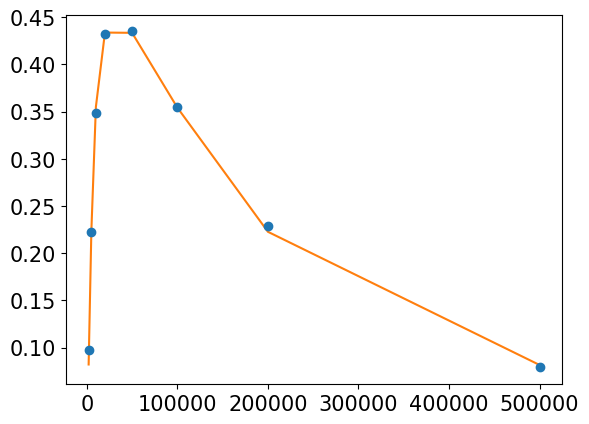

In [32]:
plt.errorbar(freq,R100_g,yerr=R100_gerr, marker='o', linestyle='')
plt.plot(freq, R100g_yfit)

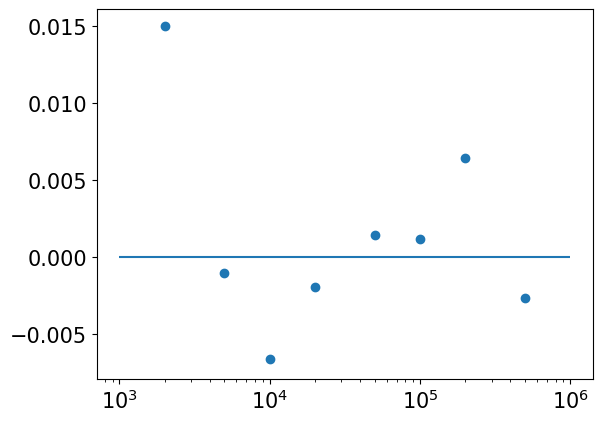

In [33]:
plt.errorbar(freq,R100g_res,yerr=R100_gerr, marker='o', linestyle='')
plt.hlines(0, xmin=1000,xmax=1000000)
plt.xscale('log')

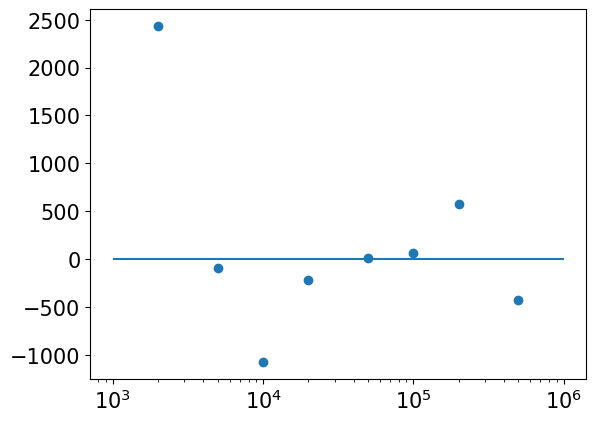

In [34]:
plt.errorbar(freq,R100_normres,yerr=np.ones(len(freq)), marker='o', linestyle='')
plt.hlines(0, xmin=1000,xmax=1000000)
plt.xscale('log')

In [35]:

df3.append(sp.trapezoid(best_band(big_range, R100g_param[0], R100g_param[1],R100g_param[2],R100g_param[3]), x=big_range))

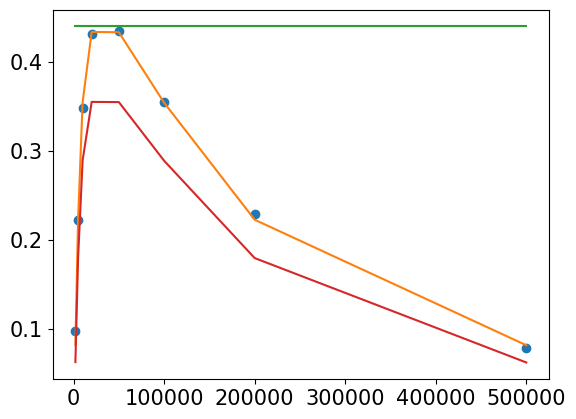

In [36]:
plt.plot(freq, R100_g, marker='o', linestyle='', label='100 Ohm Resistor')
plt.plot(freq, R100g_yfit)
plt.plot(freq, best_band(freq, 0.44, 90000, 1000000000, 0))
plt.plot(freq, best_band(freq, 0.4, R100g_param[1],R100g_param[2],R100g_param[3]))

In [37]:
R1kg_param, R1kg_cov = curve_fit(best_band, freq, R1k_g, sigma = R1k_gerr, absolute_sigma = True, p0=[0.1,1000000000, 90000,  0])
R1kg_paramerr=np.sqrt(np.diag(R1kg_cov))
R1kg_yfit=best_band(freq, R1kg_param[0], R1kg_param[1],R1kg_param[2],R1kg_param[3])
R1kg_res=R1k_g-R1kg_yfit
R1k_normres=R1kg_res/R1k_gerr
R1k_chisq=sum(R1k_normres**2)
R1k_rdc=R1k_chisq/len(R1kg_yfit)
print('gain=', R1kg_param[0],'+/-',R1kg_paramerr[0], 'squared central frequency=',R1kg_param[1], '+/-', R1kg_paramerr[1], 'bandwidth=', R1kg_param[2], '+/-', R1kg_paramerr[2],'constant offset=', R1kg_param[3], '+/-', R1kg_paramerr[3])

gain= 0.08828079622031948 +/- 5.738809089734904e-06 squared central frequency= 882634028.4420925 +/- 97882.55434468354 bandwidth= 109802.43569022727 +/- 17.89561406528884 constant offset= -0.008532300932556634 +/- 6.044937030180846e-06


In [38]:
print(R1k_rdc)

517592.91704271815


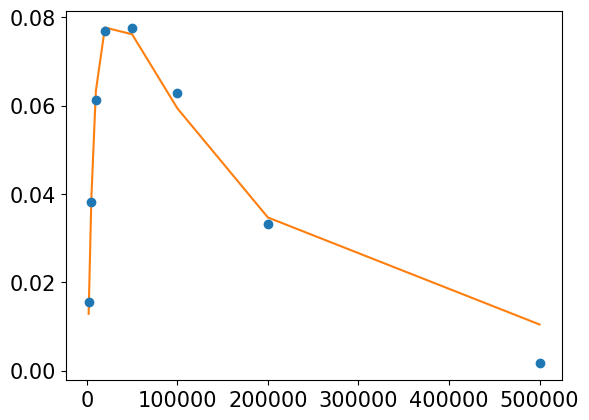

In [39]:
plt.errorbar(freq,R1k_g,yerr=R1k_gerr, marker='o', linestyle='')
plt.plot(freq, R1kg_yfit)

In [40]:
df3.append(sp.trapezoid(best_band(big_range, R1kg_param[0], R1kg_param[1],R1kg_param[2],R1kg_param[3]), x=big_range))

In [41]:
R10kg_param, R10kg_cov = curve_fit(best_band, freq, R10k_g, sigma = R10k_gerr, absolute_sigma = True, p0=[0.1,1000000000, 90000,  0])
R10kg_paramerr=np.sqrt(np.diag(R10kg_cov))
R10kg_yfit=best_band(freq, R10kg_param[0], R10kg_param[1],R10kg_param[2],R10kg_param[3])
R10kg_res=R10k_g-R10kg_yfit
R10k_normres=R10kg_res/R10k_gerr
R10k_chisq=sum(R10k_normres**2)
R10k_rdc=R10k_chisq/len(R10kg_yfit)
print('gain=', R10kg_param[0],'+/-',R10kg_paramerr[0], 'squared central frequency=',R10kg_param[1], '+/-', R10kg_paramerr[1], 'bandwidth=', R10kg_param[2], '+/-', R10kg_paramerr[2],'constant offset=', R10kg_param[3], '+/-', R10kg_paramerr[3])

gain= 0.007545100925973561 +/- 5.14774903517662e-06 squared central frequency= 865821676.1612399 +/- 1137230.7592875496 bandwidth= 84871.22741112635 +/- 175.15995095833517 constant offset= -0.0006838347793134889 +/- 5.1224926286012575e-06


In [42]:
print(R10k_rdc)

2114.563255320703


In [43]:
df3.append(sp.trapezoid(best_band(big_range, R10kg_param[0], R10kg_param[1],R10kg_param[2],R10kg_param[3]), x=big_range))

In [44]:
R100kg_param, R100kg_cov = curve_fit(best_band, freq, R100k_g, sigma = R100k_gerr, absolute_sigma = True, p0=[0.0001,1000000000, 60000,  0])
R100kg_paramerr=np.sqrt(np.diag(R100kg_cov))
R100kg_yfit=best_band(freq, R100kg_param[0], R100kg_param[1],R100kg_param[2],R100kg_param[3])
R100kg_res=R100k_g-R100kg_yfit
R100k_normres=R100kg_res/R100k_gerr
R100k_chisq=sum(R100k_normres**2)
R100k_rdc=R100k_chisq/len(R100kg_yfit)
print('gain=', R100kg_param[0],'+/-',R100kg_paramerr[0], 'squared central frequency=',R100kg_param[1], '+/-', R100kg_paramerr[1], 'bandwidth=', R100kg_param[2], '+/-', R100kg_paramerr[2],'constant offset=', R100kg_param[3], '+/-', R100kg_paramerr[3])

gain= 0.0001403285647872801 +/- 5.451496217917257e-06 squared central frequency= 828756697.5834216 +/- 55159908.43442186 bandwidth= 67178.99917195564 +/- 7019.254674389962 constant offset= 0.0004560448175040126 +/- 5.1270267756251624e-06


In [45]:
print(R100k_rdc)

0.7580617179106806


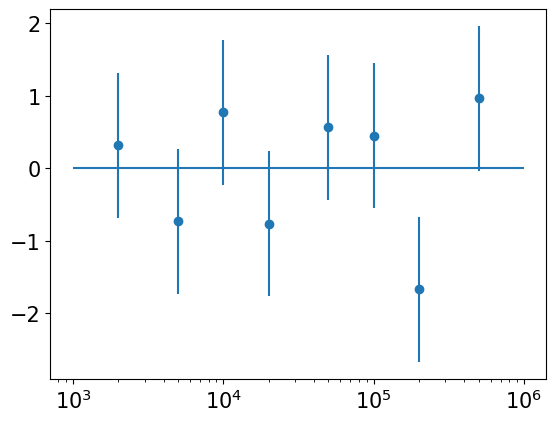

In [46]:
plt.errorbar(freq,R100k_normres,yerr=np.ones(len(freq)), marker='o', linestyle='')
plt.hlines(0, xmin=1000,xmax=1000000)
plt.xscale('log')

In [47]:
df3.append(sp.trapezoid(best_band(big_range, R100kg_param[0], R100kg_param[1],R100kg_param[2],R100kg_param[3]), x=big_range))

In [48]:
#bandwidth list
delta_f=[R0g_param[2],R100g_param[2],R1kg_param[2], R10kg_param[2], R100kg_param[2]]
delta_ferr=[R0g_paramerr[2], R100g_paramerr[2],R1kg_paramerr[2], R10kg_paramerr[2], R100kg_paramerr[2]]

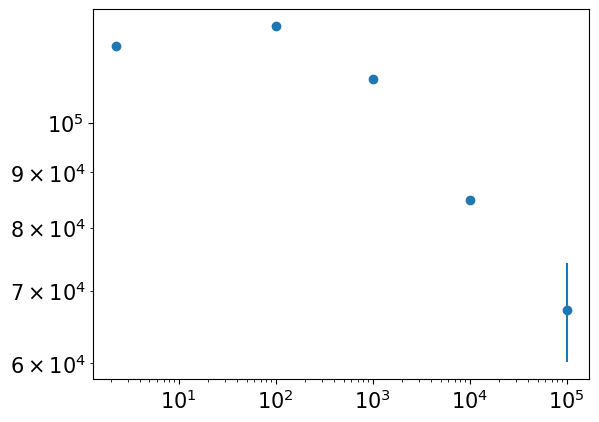

In [49]:
plt.errorbar(R_a[:5],delta_f,yerr=delta_ferr, marker='o',  linestyle='')
plt.xscale('log')
plt.yscale('log')

In [50]:
def mult_err(param1,error1,param2,error2):
    err=param1*param2*np.sqrt((error1/param1)**2+(error2/param2)**2)
    return err

In [51]:
mult_err(R0g_param[0],R0g_paramerr[0],R0g_param[2],R0g_paramerr[2])

4.635662060974382

In [52]:
mult_err(R100g_param[0],R100g_paramerr[0],R100g_param[2],R100g_paramerr[2])

4.151619844558294

In [53]:
def err_prop(param,err):
    return err/param

In [54]:
print(np.array([R0g_param[0]/R0g_paramerr[0], R100g_param[0]/R100g_paramerr[0], R1kg_param[0]/R1kg_paramerr[0], R10kg_param[0]/R10kg_paramerr[0], R100kg_param[0]/R100kg_paramerr[0]])**-1)

[1.24527930e-05 2.43092154e-05 6.50063132e-05 6.82263774e-04
 3.88480865e-02]


In [55]:
print(np.array([R0g_param[2]/R0g_paramerr[2], R100g_param[2]/R100g_paramerr[2], R1kg_param[2]/R1kg_paramerr[2], R10kg_param[2]/R10kg_paramerr[2], R100kg_param[2]/R100kg_paramerr[2]])**-1)

[4.15416052e-05 6.59553629e-05 1.62980119e-04 2.06383195e-03
 1.04485848e-01]


In [56]:
print(R0g_param[0]*R0g_param[2]*np.sqrt((R0g_param[0]/R0g_paramerr[0])**-2+(R0g_param[2]/R0g_paramerr[2]))**-2)

4.440443905160795


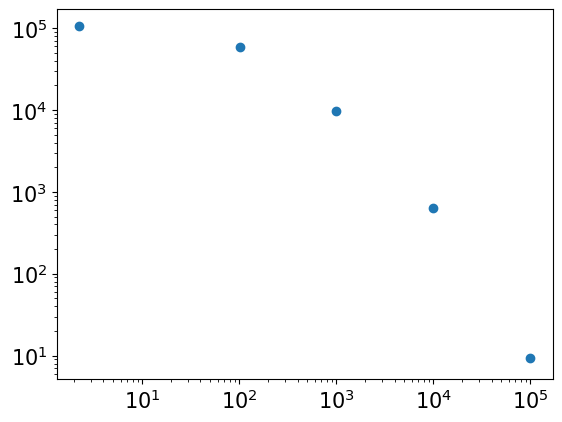

In [57]:
#Let's compare other measurements of delta f
df2=np.array([R0g_param[0]*R0g_param[2], R100g_param[0]*R100g_param[2], R1kg_param[0]*R1kg_param[2], R10kg_param[0]*R10kg_param[2], R100kg_param[0]*R100kg_param[2]])
df2_err=np.array([mult_err(R0g_param[0],R0g_paramerr[0],R0g_param[2],R0g_paramerr[2]), mult_err(R100g_param[0],R100g_paramerr[0],R100g_param[2],R100g_paramerr[2]), mult_err(R1kg_param[0],R1kg_paramerr[0],R1kg_param[2],R1kg_paramerr[2]), mult_err(R10kg_param[0],R10kg_paramerr[0],R10kg_param[2],R10kg_paramerr[2]), mult_err(R100kg_param[0],R100kg_paramerr[0],R100kg_param[2],R100kg_paramerr[2])])
plt.errorbar(R_a[:5],df2, yerr=df2_err, marker='o',  linestyle='')
plt.xscale('log')
plt.yscale('log')

In [58]:
print(df2_err)

[4.63566206 4.15161984 1.70087091 1.39194223 1.05088074]


In [59]:
print(df2)

[1.06891486e+05 5.90619864e+04 9.69344645e+03 6.40361977e+02
 9.42713254e+00]


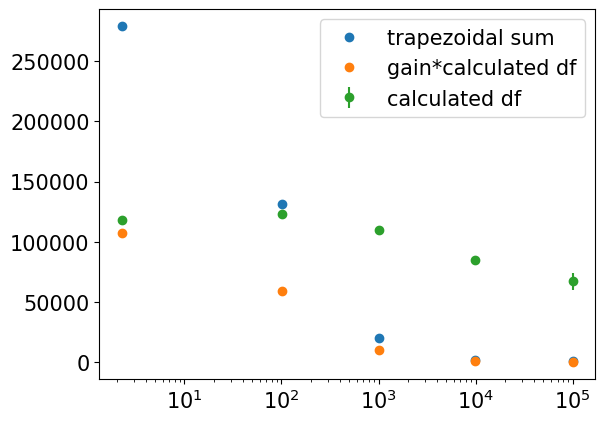

In [60]:
df3_a=np.array(df3)
plt.plot(R_a[:5], df3, marker='o', linestyle='', label='trapezoidal sum')
plt.plot(R_a[:5],df2, marker='o',  linestyle='', label='gain*calculated df')
plt.errorbar(R_a[:5],delta_f,yerr=delta_ferr, marker='o',  linestyle='', label='calculated df')
plt.xscale('log')
plt.legend()

In [61]:
print(err_prop(df2,df2_err))

[4.33679261e-05 7.02925874e-05 1.75466065e-04 2.17368033e-03
 1.11474061e-01]


In [62]:
#R0g_param,R0g_cov,R0g_paramerr,R0g_yfit,R0g_res=fitfunc_err(band_pass_tf,freq, R0_g, R0_gerr)
#print('gain=', R0g_param[0],'+/-',R0g_paramerr[0], 'squared central frequency=',R0g_param[1], '+/-', R0g_paramerr[1], 'bandwidth=', R0g_param[2], '+/-', R0g_paramerr[2],'constant offset=', R0g_param[3], '+/-', R0g_paramerr[3])

In [63]:
#R100g_param,R100g_cov,R100g_paramerr,R100g_yfit,R100g_res=fitfunc_err(band_pass_tf,freq, R100_g, R100_gerr)
#print('K=', R100g_param[0],'+/-',R100g_paramerr[0], 'w_0=',R100g_param[1], '+/-', R100g_paramerr[1], 'Q=', R100g_param[2], '+/-', R100g_paramerr[2], 'C=', R100g_param[3], '+/-', R100g_paramerr[3])

In [64]:
#R1kg_param,R1kg_cov,R1kg_paramerr,R1kg_yfit,R1kg_res=fitfunc_err(band_pass_tf,freq, R1k_g, R1k_gerr)
#print('K=', R1kg_param[0],'+/-',R1kg_paramerr[0], 'w_0=',R1kg_param[1], '+/-', R1kg_paramerr[1], 'Q=', R1kg_param[2], '+/-', R1kg_paramerr[2], 'C=', R1kg_param[3], '+/-', R1kg_paramerr[3])

In [65]:
#R10kg_param,R10kg_cov,R10kg_paramerr,R10kg_yfit,R10kg_res=fitfunc_err(band_pass_tf,freq, R10k_g, R10k_gerr)
#print('K=', R10kg_param[0],'+/-',R10kg_paramerr[0], 'w_0=',R10kg_param[1], '+/-', R10kg_paramerr[1], 'Q=', R10kg_param[2], '+/-', R10kg_paramerr[2], 'C=', R10kg_param[3], '+/-', R10kg_paramerr[3])

In [66]:
#R100kg_param,R100kg_cov,R100kg_paramerr,R100kg_yfit,R100kg_res=fitfunc_err(band_pass_tf,freq, R100k_g, R100k_gerr)
#print('K=', R100kg_param[0],'+/-',R100kg_paramerr[0], 'w_0=',R100kg_param[1], '+/-', R100kg_paramerr[1], 'Q=', R100kg_param[2], '+/-', R100kg_paramerr[2], 'C=', R100kg_param[3], '+/-', R100kg_paramerr[3])

Text(0, 0.5, 'Normalized V_rmsout over V_rmsin')

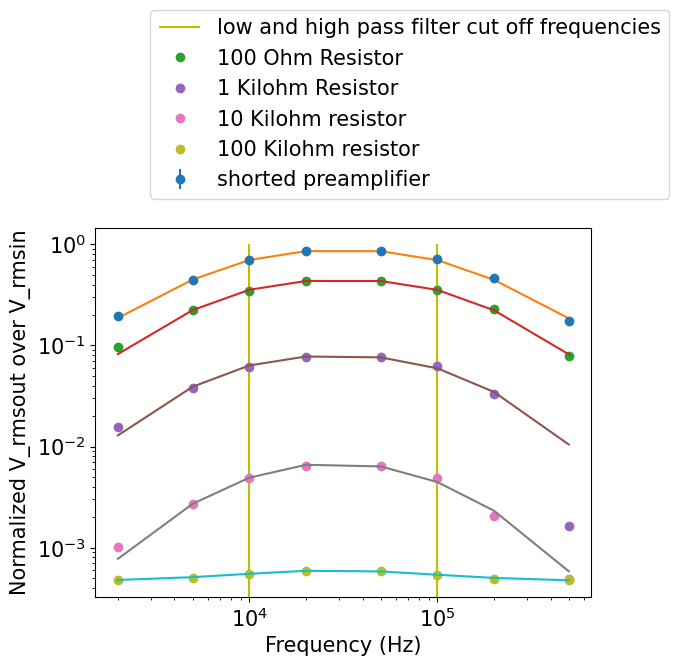

In [67]:
full_span=np.linspace(1000,1000000)
plt.vlines(x=10000, ymin=0,ymax=1, color='y', label='low and high pass filter cut off frequencies')
plt.vlines(x=100000, ymin=0,ymax=1, color='y')
plt.errorbar(freq, R0_g, yerr=R0_gerr, marker='o', linestyle='', label='shorted preamplifier')
plt.plot(freq, R0g_yfit)
#plt.plot(full_span,band_pass_tf(full_span, 1000000000, 90000, 1000000000, 0))
plt.plot(freq, R100_g, marker='o', linestyle='', label='100 Ohm Resistor')
plt.plot(freq, R100g_yfit)
plt.plot(freq, R1k_g,marker='o', linestyle='', label='1 Kilohm Resistor')
plt.plot(freq, R1kg_yfit)
plt.plot(freq, R10k_g,marker='o', linestyle='', label='10 Kilohm resistor')
plt.plot(freq, R10kg_yfit)
plt.plot(freq, R100k_g,marker='o', linestyle='', label='100 Kilohm resistor')
plt.plot(freq, R100kg_yfit)

plt.legend(bbox_to_anchor=(0.09,1.05))
plt.yscale('log')
plt.xscale('log')
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Normalized V_rmsout over V_rmsin')

# Temperature Dependence Plot

In [68]:
#constants
osci_vrms_bg=18.49 #mV
osci_vrms_bg_err=0.04 #mV


In [69]:
swp_osci=np.array(pd.read_csv('Data/osci_t_swp.csv'))#in mV and C
swp_dmm=np.array(pd.read_csv('Data/temp_sweep_dmm.csv')) #in mV and C

Text(0, 0.5, 'V_rms (mV)')

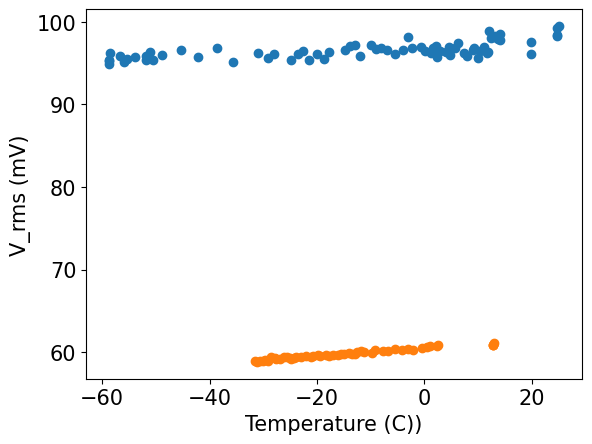

In [70]:
plt.scatter(swp_osci[:,0], swp_osci[:,1])
plt.scatter(swp_dmm[:,0], swp_dmm[:,1])
plt.xlabel("Temperature (C))")
plt.ylabel("V_rms (mV)")

In [71]:
print(dmm_vrms_bg)

11.517


In [72]:
#let's convert from celcius to kelvin
osci_t_swp=(swp_osci[:,0]+273.15)
dmm_t_swp=(swp_dmm[:,0]+273.15)
# now let's adjust the vrms and square it
osci_vrms_sq_swp=(swp_osci[:,1]-osci_vrms_bg)**2
dmm_vrms_sq_swp=(swp_dmm[:,1]-dmm_vrms_bg)**2

In [73]:
print(osci_vrms_sq_swp,swp_osci[:,1])

[6392.0025 6374.4256 6515.7184 6564.2404 6259.9744 6032.6289 6155.9716
 6138.7225 6176.3881 6014.0025 6146.56   5973.7441 6101.1721 6000.0516
 5921.3025 6054.3961 5981.4756 5962.9284 5922.8416 5869.0921 5978.3824
 5836.96   5892.0976 5912.0721 6048.1729 5916.6864 5881.3561 6038.8441
 5942.8681 6021.76   5921.3025 6018.6564 6076.2025 5912.0721 6024.8644
 5938.2436 6062.1796 6108.9856 6181.1044 6198.4129 5995.4049 6196.8384
 6110.5489 6134.0224 6096.4864 6031.0756 6102.7344 6342.5296 6134.0224
 6160.6801 6074.6436 6041.9529 5972.1984 6082.4401 6054.3961 6130.89
 6242.5801 6045.0625 5990.76   6105.8596 6140.2896 5956.7524 6084.
 6151.2649 6045.0625 6059.0656 6459.3369 6321.8401 6366.4441 6331.3849
 6313.8916 6288.49   6398.4001] [98.44 98.33 99.21 99.51 97.61 96.16 96.95 96.84 97.08 96.04 96.89 95.78
 96.6  95.95 95.44 96.3  95.83 95.71 95.45 95.1  95.81 94.89 95.25 95.38
 96.26 95.41 95.18 96.2  95.58 96.09 95.44 96.07 96.44 95.38 96.11 95.55
 96.35 96.65 97.11 97.22 95.92 97.21 96.66 96

In [74]:
print(dmm_vrms_sq_swp,swp_dmm[:,1])

[2440.656409 2436.705769 2433.744889 2464.427449 2432.758329 2425.858009
 2421.919369 2413.069129 2394.438489 2373.930729 2392.481569 2377.830169
 2390.525449 2368.087569 2366.141449 2371.982209 2346.724249 2350.601289
 2367.114409 2349.631729 2333.179809 2334.145969 2342.850409 2324.493369
 2329.317169 2317.748449 2319.674569 2308.129849 2317.748449 2304.288009
 2315.823129 2301.408729 2292.781689 2304.288009 2295.655569 2292.781689
 2279.394049 2270.808409 2280.349009 2294.697409 2289.909609 2267.950129
 2276.530369 2282.259529 2289.909609 2243.253769 2261.287809 2244.201129
 2250.838249 2237.573809 2249.889489] [60.92 60.88 60.85 61.16 60.84 60.77 60.73 60.64 60.45 60.24 60.43 60.28
 60.41 60.18 60.16 60.22 59.96 60.   60.17 59.99 59.82 59.83 59.92 59.73
 59.78 59.66 59.68 59.56 59.66 59.52 59.64 59.49 59.4  59.52 59.43 59.4
 59.26 59.17 59.27 59.42 59.37 59.14 59.23 59.29 59.37 58.88 59.07 58.89
 58.96 58.82 58.95]


Text(0, 0.5, 'V_rms squared (mV)')

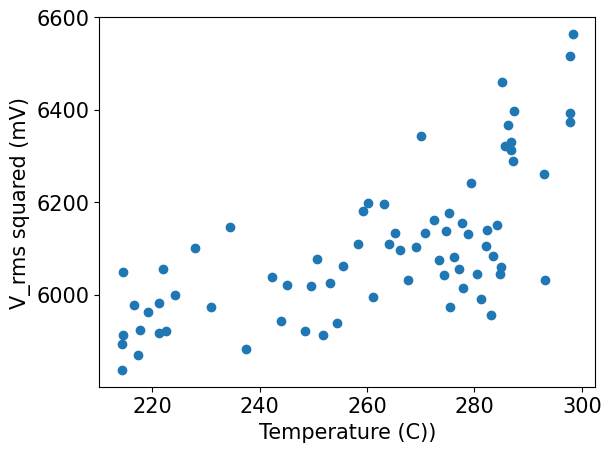

In [75]:
plt.scatter(osci_t_swp,osci_vrms_sq_swp)
plt.xlabel("Temperature (C))")
plt.ylabel("V_rms squared (mV)")

Text(0, 0.5, 'V_rms squared (mV)')

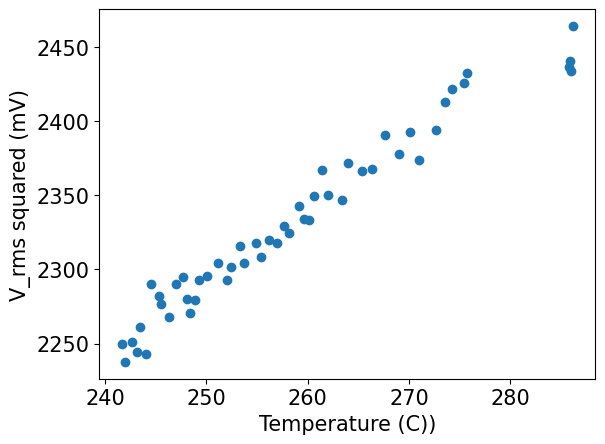

In [76]:
plt.scatter(dmm_t_swp,dmm_vrms_sq_swp)
plt.xlabel("Temperature (C))")
plt.ylabel("V_rms squared (mV)")

In [77]:
print(dmm_t_swp, dmm_vrms_sq_swp)

[285.91 285.85 286.   286.17 275.75 275.45 274.25 273.6  272.65 270.95
 270.15 269.05 267.65 266.35 265.4  264.   263.4  262.   261.4  260.65
 260.15 259.65 259.15 258.15 257.65 257.   256.15 255.35 254.9  253.75
 253.3  252.4  252.04 251.15 250.1  249.25 248.9  248.4  248.1  247.65
 247.   246.35 245.56 245.35 244.53 244.06 243.4  243.14 242.64 242.01
 241.65] [2440.656409 2436.705769 2433.744889 2464.427449 2432.758329 2425.858009
 2421.919369 2413.069129 2394.438489 2373.930729 2392.481569 2377.830169
 2390.525449 2368.087569 2366.141449 2371.982209 2346.724249 2350.601289
 2367.114409 2349.631729 2333.179809 2334.145969 2342.850409 2324.493369
 2329.317169 2317.748449 2319.674569 2308.129849 2317.748449 2304.288009
 2315.823129 2301.408729 2292.781689 2304.288009 2295.655569 2292.781689
 2279.394049 2270.808409 2280.349009 2294.697409 2289.909609 2267.950129
 2276.530369 2282.259529 2289.909609 2243.253769 2261.287809 2244.201129
 2250.838249 2237.573809 2249.889489]


In [78]:
# Let's see the quality of fit for a linear relationship to both
dmm_swp_param, dmm_swp_cov = curve_fit(line, dmm_t_swp, dmm_vrms_sq_swp)
dmm_swp_paramerr=np.sqrt(np.diag(dmm_swp_cov))
dmm_swp_yfit=line(dmm_t_swp, dmm_swp_param[0], dmm_swp_param[1])
dmm_swp_res=dmm_vrms_sq_swp-dmm_swp_yfit
print('m=', dmm_swp_param[0],'+/-',dmm_swp_paramerr[0], 'b=',dmm_swp_param[1], '+/-', dmm_swp_paramerr[1])

m= 4.642284352181863 +/- 0.13278128702676983 b= 1131.6565942527714 +/- 34.395679601535974


In [79]:
dmm_swp_param,dmm_swp_cov,dmm_swp_paramerr,dmm_swp_yfit,dmm_swp_yfiterr,dmm_swp_res=fitfunc_noerr(line,dmm_t_swp,dmm_vrms_sq_swp)

Text(0, 0.5, 'V_rms squared (mV)')

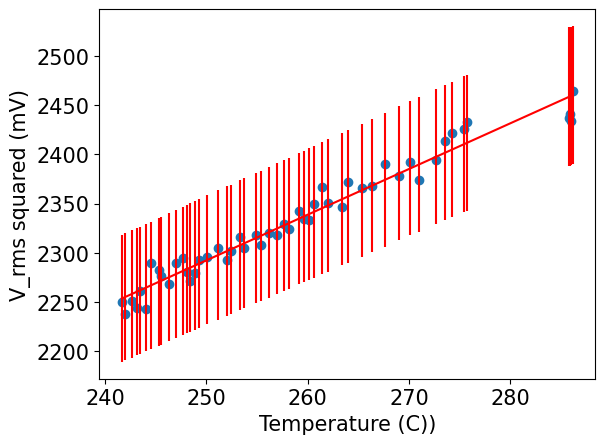

In [80]:
plt.scatter(dmm_t_swp,dmm_vrms_sq_swp)
plt.errorbar(dmm_t_swp, dmm_swp_yfit,yerr=dmm_swp_yfiterr, color='r')
plt.xlabel("Temperature (C))")
plt.ylabel("V_rms squared (mV)")

m= 4.642284352181863 +/- 0.13278128702676983 b= 1131.6565942527714 +/- 34.395679601535974


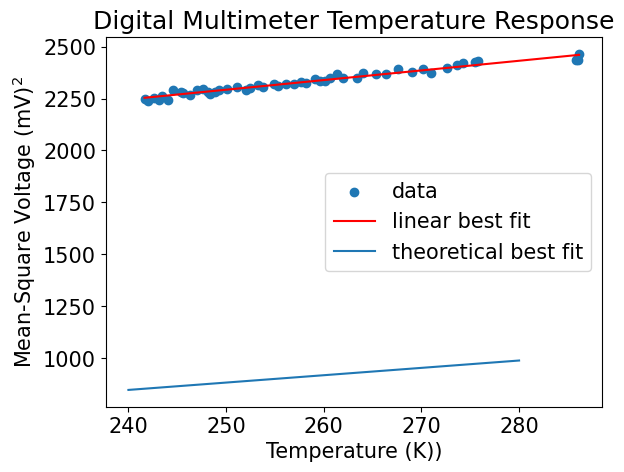

In [128]:
rangey1=np.linspace(240,280)
kb=1.38*10**-23
deltaf=640.4
normalization=10**8*10**6*10**6
plt.scatter(dmm_t_swp,dmm_vrms_sq_swp, label='data')
plt.plot(dmm_t_swp, dmm_swp_yfit,color='r', label='linear best fit')
plt.plot(rangey1,4*normalization*deltaf*kb*rangey1, label='theoretical best fit')
plt.xlabel("Temperature (K))")
plt.ylabel("Mean-Square Voltage (mV)$^{2}$")
plt.legend()
plt.title('Digital Multimeter Temperature Response')
print('m=', dmm_swp_param[0],'+/-',dmm_swp_paramerr[0], 'b=',dmm_swp_param[1], '+/-', dmm_swp_paramerr[1])

In [126]:
print(4*normalization*deltaf*kb)

3.5350079999999995


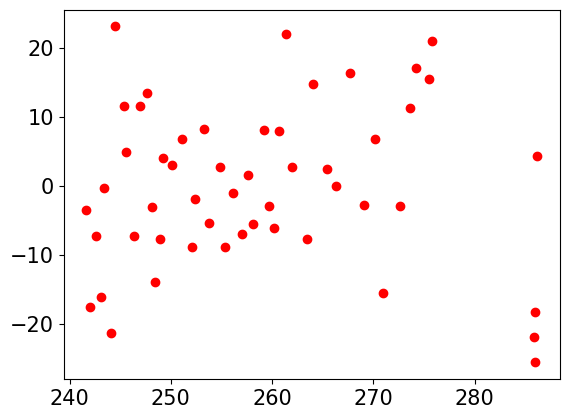

In [82]:
plt.scatter(dmm_t_swp, dmm_swp_res, color='r')

In [83]:
osci_swp_param,osci_swp_cov,osci_swp_paramerr,osci_swp_yfit,osci_swp_yfiterr,osci_swp_res=fitfunc_noerr(line,osci_t_swp,osci_vrms_sq_swp)

m= 4.251621445045017 +/- 0.5325141408541427 b= 4990.286405788129 +/- 139.882507122277


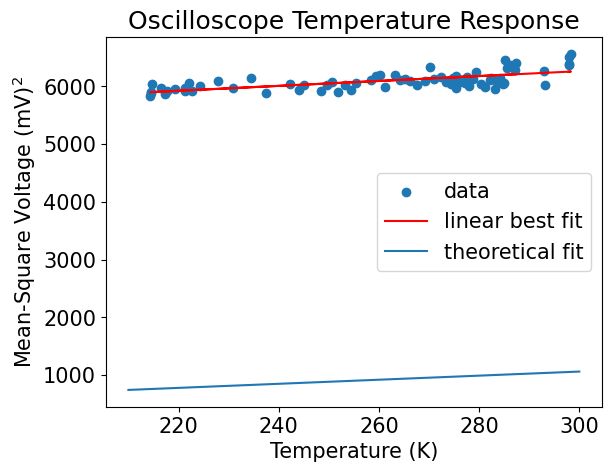

In [127]:
rangey=np.linspace(210,300)
kb=1.38*10**-23
deltaf=640.4
normalization=10**8*10**6*10**6
plt.scatter(osci_t_swp,osci_vrms_sq_swp, label='data')
plt.plot(osci_t_swp, osci_swp_yfit,color='r', label='linear best fit')
plt.plot(rangey,4*normalization*deltaf*kb*rangey, label='theoretical fit')
plt.xlabel("Temperature (K)")
plt.ylabel(r"Mean-Square Voltage (mV)$^{2}$")
plt.legend()
#plt.yscale('log')
plt.title('Oscilloscope Temperature Response')
print('m=', osci_swp_param[0],'+/-',osci_swp_paramerr[0], 'b=',osci_swp_param[1], '+/-', osci_swp_paramerr[1])

In [121]:
print(4*normalization*deltaf*kb)

3.5350079999999995


In [97]:
print(rangey)

[210.         211.83673469 213.67346939 215.51020408 217.34693878
 219.18367347 221.02040816 222.85714286 224.69387755 226.53061224
 228.36734694 230.20408163 232.04081633 233.87755102 235.71428571
 237.55102041 239.3877551  241.2244898  243.06122449 244.89795918
 246.73469388 248.57142857 250.40816327 252.24489796 254.08163265
 255.91836735 257.75510204 259.59183673 261.42857143 263.26530612
 265.10204082 266.93877551 268.7755102  270.6122449  272.44897959
 274.28571429 276.12244898 277.95918367 279.79591837 281.63265306
 283.46938776 285.30612245 287.14285714 288.97959184 290.81632653
 292.65306122 294.48979592 296.32653061 298.16326531 300.        ]


# Actual k_B plot

In [ ]:

#arrays of relevant parameters already found
#Temperature in Fahrenheit
T=np.array([68.97, 69.27, 69.58, 69.75, 69.88])
T_err=np.array([0.21, 0.10, 0.24, 0.12, 0.04])
#Resistors in Ohms
Rk_a=np.array([101.7456, 1003.372, 9949.432, 100340.6, 996850])
Rkerr_a=np.array([0.0022, 0.008, 0.0008, 1.7, 190])
#V_rms
V_rms=np.array([13.572, 19.985, 66.43, 119.7, 114.71])#mV
V_rmserr=np.array([0.010, 0.017, 0.07, 0.4, 0.07])#mV
df=np.array([90000, 90000, 90000, 90000, 90000])


In [ ]:
#Put temperature in kelvin
TK=(T-32)*5/9+273.15
TK_err=(T_err)*5/9

In [ ]:
#adjust V_rms and Vrms_err to account for backgrounds and gain
V_rms1=(V_rms/1000-dmm_vrms_bg/1000)**2/10000**2
V_rmserr1=2*V_rms1*np.sqrt(V_rmserr**2/V_rms**2+dmm_vrms_bg_err**2/dmm_vrms_bg**2)

In [ ]:
print(V_rms1)

In [ ]:
#Let's set resistance as our x values
x=Rk_a
#Let's set V_rms/(4*T*df) as the y values
y=V_rms1/(4*TK*df2)
yerr=y*np.sqrt(V_rmserr1**2/V_rms1**2+TK_err**2/TK**2+df2_err**2/df2**2)

In [ ]:
print(y, yerr)

In [ ]:
print(yerr/y)

In [ ]:
print(V_rmserr1/V_rms1)

In [ ]:
print(TK_err/TK)

In [ ]:
len(y[:-1])

In [ ]:
xtrim=x[:-1]
ytrim=y[:-1]
yerrtrim=yerr[:-1]
# let's try fitting this data
param, cov = curve_fit(line, xtrim, ytrim, sigma = yerrtrim , absolute_sigma = True)
paramerr=np.sqrt(np.diag(cov))
yfittrim=line(xtrim, param[0], param[1])
#yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
restrim=ytrim-yfittrim
normrestrim=restrim/yerrtrim
chisqtrim=sum(normrestrim**2)
rdctrim=chisqtrim/len(yfittrim)

In [ ]:
plt.errorbar(xtrim, restrim, yerr=yerrtrim, marker='o', linestyle='', label='data')
plt.hlines(y=0, xmin=100,xmax=1000000)
#plt.yscale('log')
plt.xscale('log')

In [ ]:
plt.errorbar(xtrim, normrestrim, yerr=np.ones(len(yerrtrim)), marker='o', linestyle='', label='data',)
plt.hlines(y=0, xmin=100,xmax=1000000)
#plt.yscale('log')
plt.xscale('log')

In [ ]:
print(rdctrim, param,paramerr)

In [ ]:
# let's try fitting this data
param, cov = curve_fit(line, x, y, sigma = yerr , absolute_sigma = True)
paramerr=np.sqrt(np.diag(cov))
yfit=line(x, param[0], param[1])
#yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
res=y-yfit
normres=res/yerr
chisq=sum(normres**2)
rdc=chisq/len(yfit)

In [ ]:
plt.errorbar(x, res, yerr=yerr, marker='o', linestyle='', label='data')
plt.hlines(y=0, xmin=100,xmax=1000000)
#plt.yscale('log')
plt.xscale('log')

In [ ]:
plt.errorbar(x, normres, yerr=np.ones(len(normres)), marker='o', linestyle='', label='data')
plt.hlines(y=0, xmin=100,xmax=1000000)
#plt.yscale('log')
plt.xscale('log')

In [ ]:
print(rdc)

In [ ]:
plt.errorbar(x, y, yerr=yerr, marker='o', linestyle='', label='data')
#plt.plot(np.linspa4ce(0,1000000), 1.38*10**-23*np.linspace(0,1000000))
plt.plot(np.linspace(0,1000000), line(np.linspace(0,1000000), param[0], param[1]), label='linear best fit')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Resistance')
plt.ylabel('V_rms^2/4*df*T')

In [ ]:
print(param, paramerr)

In [ ]:
plt.errorbar(x, y, yerr=yerr, marker='o', linestyle='', label='data')
#plt.plot(np.linspace(0,1000000), 1.38*10**-23*np.linspace(0,1000000))
plt.plot(np.linspace(0,1000000), line(np.linspace(0,1000000), param[0], param[1]), label='linear best fit')
plt.plot(np.linspace(0,1000000), line(np.linspace(0,1000000), 1.38*10**-23, 0), label='theoretical fit')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Resistance')
plt.ylabel(r'$V_{rms}^{2}/(4~\Delta f~T$)')

In [ ]:
print(V_rms1,V_rmserr1)

In [ ]:
R100_kb=V_rms1[0]/(4*delta_f[1]*Rk_a[0]*TK[0])
print(R100_kb)

In [ ]:
R100_kb=V_rms1[0]/(4*df2[1]*Rk_a[0]*TK[0])
print(R100_kb)

In [ ]:
#Let's do a quick fit
x=Rk_a
y=V_rms1/(4*df*TK)
yerr=V_rms1/(4*Rk_a*TK)*np.sqrt((V_rmserr1/V_rms1)**2+(TK_err/T)**2)

In [ ]:
yerr=V_rms1/(4*Rk_a*T)*np.sqrt((V_rmserr1/V_rms1)**2+(T_err/T)**2)
param, cov = curve_fit(line, x, y, sigma = yerr , absolute_sigma = True)
paramerr=np.sqrt(np.diag(cov))
yfit=line(x, param[0], param[1])
#yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
res=y-yfit

In [ ]:
print(param, paramerr)

In [ ]:
plt.errorbar(x, y, yerr=yerr, marker='o', linestyle='', label='data')
#plt.plot(np.linspace(0,1000000), 1.38*10**-23*np.linspace(0,1000000))
plt.plot(np.linspace(0,1000000), line(np.linspace(0,1000000), param[0], param[1]), label='linear best fit')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Resistance')
plt.ylabel('V_rms^2/4*df*T')

In [ ]:
k_b=V_rms/1000000**2/(4*Rk_a*TK*df)

In [ ]:
print(k_b)

In [ ]:
#Let's do a quick fit
x=Rk_a
y=V_rms1/(4*df*TK)
yerr=V_rms1/(4*Rk_a*TK)*np.sqrt((V_rmserr1/V_rms1)**2+(TK_err/T)**2)

In [ ]:
print(df)

In [ ]:
yerr=V_rms1/(4*Rk_a*T)*np.sqrt((V_rmserr1/V_rms1)**2+(T_err/T)**2)
param, cov = curve_fit(line, x, y, sigma = yerr , absolute_sigma = True)
paramerr=np.sqrt(np.diag(cov))
yfit=line(x, param[0], param[1])
#yfiterr=np.sqrt((yfit*paramerr[0]/param[0])**2+(paramerr[1]/param[1])**2)
res=y-yfit

In [ ]:
print(param)

In [ ]:
plt.errorbar(Rk_a, V_rms1/(4*df*T), yerr=V_rms1/(4*Rk_a*T)*np.sqrt((V_rmserr1/V_rms1)**2+(T_err/T)**2), marker='o', linestyle='')
plt.plot(np.linspace(0,1000000), 1.38*10**-23*np.linspace(0,1000000))
plt.plot(np.linspace(0,1000000),line(np.linspace(0,1000000), param[0], param[1]))
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Resistance')
plt.ylabel('V_rms^2/4*df*T')

In [ ]:
print(V_rmserr1)

In [ ]:
print(V_rms1[0]/(TK[0]*Rk_a[0]*90000))

In [ ]:
print(V_rms1[0],TK[0], Rk_a[0])

In [ ]:
k_B=V_rmsq/10000**2/(4*TK*df*Rk_a)
k_Berr=
print(k_B)